# Prepare csv data for baltic sea level

You can safely skip this notebook and move on to the next if you just want to get into the basics of reading text data with a well-behaved data set.  You might come back later, to learn about handling weirdly formatted text files, though.

In [1]:
# import relevant modules
%matplotlib inline
import pandas as pd

Inspect existing data files. (They are not in a nice format!)

In [2]:
!ls data/baltic_sea_level/

OSTSEE_FLENSBURG.dat          OSTSEE_LT+KIEL.dat
OSTSEE_GREIFSWALD-WIECK.dat   baltic_sea_level_combined.csv


In [3]:
!head data/baltic_sea_level/OSTSEE_FLENSBURG.dat

# OSTSEE_FLENSBURG
time-stamp sea-level-in-m
2018-01-16T00:01 480.000000
2018-01-16T00:02 480.000000
2018-01-16T00:03 480.000000
2018-01-16T00:04 480.000000
2018-01-16T00:05 480.000000
2018-01-16T00:06 480.000000
2018-01-16T00:07 480.000000
2018-01-16T00:08 480.000000


## Prepare function to read a single station time series

In [4]:
def read_sea_level_data(station_name):
    df = pd.read_csv(
        f"data/baltic_sea_level/OSTSEE_{station_name}.dat",
        skiprows=1,
        delimiter=" "
    )
    df["time-stamp"] = df["time-stamp"].apply(pd.Timestamp)
    df = df.set_index("time-stamp")
    df = df.rename(columns={"sea-level-in-m": f"{station_name} sea-level in m"})
    return df

## Load all station files and combine them into clean CSV file

In [5]:
from functools import reduce

df = reduce(
    lambda left,right: pd.merge(left,right,on='time-stamp'),
    [
        read_sea_level_data(sn)
        for sn in ["FLENSBURG", "LT+KIEL", "GREIFSWALD-WIECK"]
    ]
)

df = df.dropna()

df.to_csv("data/baltic_sea_level/baltic_sea_level_combined.csv")

## Use final CSV file

,FLENSBURG sea-level in m,LT+KIEL sea-level in m,GREIFSWALD-WIECK sea-level in m
time-stamp,,,
2018-01-16 00:01:00,480.0,459.0,452.0
2018-01-16 00:02:00,480.0,459.0,452.0
2018-01-16 00:03:00,480.0,459.0,452.0
2018-01-16 00:04:00,480.0,459.0,452.0
2018-01-16 00:05:00,480.0,459.0,452.0
...,...,...,...
2018-02-16 09:08:00,464.0,464.0,489.0
2018-02-16 09:09:00,464.0,464.0,488.0
2018-02-16 09:10:00,465.0,464.0,488.0


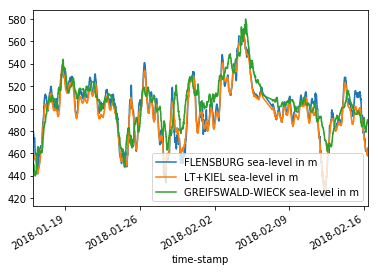

In [6]:
df = pd.read_csv("data/baltic_sea_level/baltic_sea_level_combined.csv")
df["time-stamp"] = df["time-stamp"].apply(pd.Timestamp)
df = df.set_index("time-stamp")
display(df)
df.plot();